<h1><center><font size="15">APRENDIZAJE AUTOMÁTICO (ISI-306)</font></center></h1>

<img src="Logo_1.jpg" width=800 height=600 />

<h1><center><font size="5">EXAMEN DE LABORATORIO 1</font></center></h1>

# CASO 3 - RENTA Y VENTA

#### ING: K. MARLON SOZA MAMANI

Importación de librerías:

In [2]:
# Importamos las librerias de OpenCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Tenga en cuenta:

Tres estudiantes de posgrado extranjeros buscan un lugar donde vivir mientras realizan sus estudios en el pais de Brasil. Todos forman parte de un intercambio universitario pagado (a excepción del alojamiento) y desean comprar un inmueble donde quedarse mientras terminan su programa.

- El primer estudiante ha sido asignado a una universidad de Río de Janeiro. Así mismo busca comprar un apartamento pequeño de alrededor de 60 metros cuadrados.


- El segundo estudiante tiene la opción de seleccionar la universidad de estudio, por lo cual busca comprar un apartamento en una ciudad de la región sur. Así mismo, planea viajar con su familia por lo cual busca un tamaño de 105 metros cuadrados.


- El tercer estudiante busca establecerse inmediatamente después de haber llegado a la ciudad, por lo cual busca más bien comprar un casa de alrededor 125 metros cuadrados. Se le ha asignado la cuidad de Santa Catarina

¿Cuál sería el precio recomendando para cada caso?


Utilice el datasheet de la siguiente pagina:

https://www.kaggle.com/datasets/ashishkumarjayswal/brasil-real-estate


## Segundo estudiante 

In [88]:
# --- Inserte código aqui
# --- Inserte código aqui
data = pd.read_csv('brasil.csv')

apartmentSur_data = data[(data["property_type"] == "apartment") & (data["region"] == "South")  & (data["state"] == "Rio Grande do Sul")]

print(apartmentSur_data)


      Unnamed: 0 property_type              state region        lat  \
744          745     apartment  Rio Grande do Sul  South -30.012566   
745          746     apartment  Rio Grande do Sul  South -30.039816   
746          747     apartment  Rio Grande do Sul  South -29.696850   
747          748     apartment  Rio Grande do Sul  South -30.038923   
748          749     apartment  Rio Grande do Sul  South -30.033820   
...          ...           ...                ...    ...        ...   
3738        3739     apartment  Rio Grande do Sul  South -29.692444   
3739        3740     apartment  Rio Grande do Sul  South -29.973013   
3740        3741     apartment  Rio Grande do Sul  South -29.162448   
3741        3742     apartment  Rio Grande do Sul  South -30.019669   
3742        3743     apartment  Rio Grande do Sul  South -30.047504   

            lon  area_m2  price_brl  
744  -51.136326      NaN  329382.13  
745  -51.223164     65.0  393742.15  
746  -53.858382    142.0  590613.

In [86]:
###
apartmentSur_data=apartmentSur_data.dropna()

In [89]:
matriz = np.array(apartmentSur_data)
columna_deseada = matriz[:, 2]
valores_unicos = np.unique(columna_deseada)
print("Valores únicos en la primera columna:", valores_unicos)

Valores únicos en la primera columna: ['Rio Grande do Sul']


In [90]:
# --- Obtener datos de las columnas (solo valores)
X = apartmentSur_data.values[:,6]
Y = apartmentSur_data.values[:,7]/1000
print(Y)

#print("Número de observaciones: "+str(len(Y)))

[329.38213 393.74215000000004 590.61326 ... 642.73362 434.12597999999997
 529.00765]


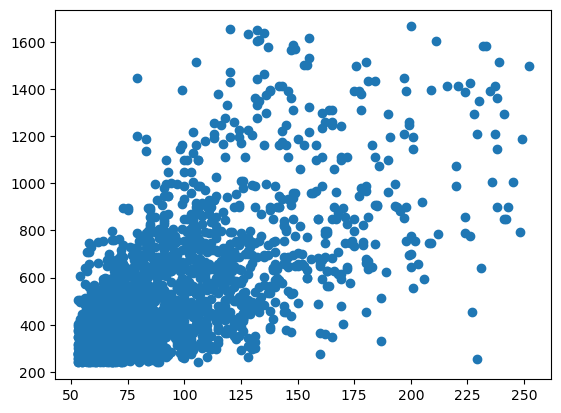

In [91]:
## Grafica con X sin empezar de cero
plt.scatter(X , Y)
plt.show()

In [113]:
w0 = 0 #Interceptor
w1 = 0 #Pendiente

n = 0.000000001 #Tamaño de paso
epochs = 15000 #Numero de Iterraciones
N = float(len(X)) #Numero de elementos en X

Error = [0]*epochs
T = np.arange(1, epochs+1)

In [114]:
#gradiente descendiente
for i in range(epochs):
    Y_pred = w0 + w1*X #Modelo predecido
    Error[i] = sum((Y-Y_pred)**2)
    D_w0 = (-2)*sum(Y-Y_pred)
    D_w1 = (-2)*sum((Y-Y_pred)*X)
    w0 = w0 - n*D_w0
    w1 = w1 - n*D_w1

In [115]:
print(w0,w1)

nan nan


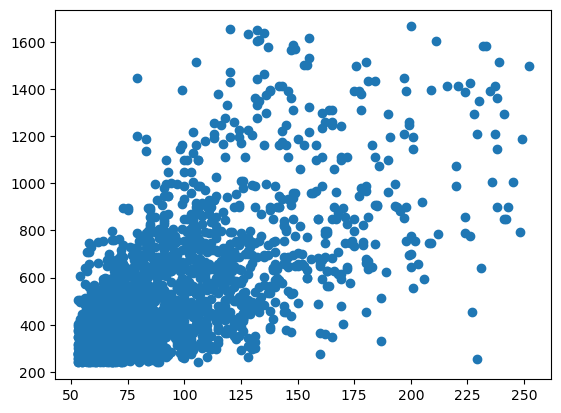

<Figure size 3500x1500 with 0 Axes>

In [109]:
Y_pred = w0 + w1 * X  # 

plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')
#plt.plot(X, Y_pred, color='red')
plt.figure(figsize=(35, 15))
plt.show()


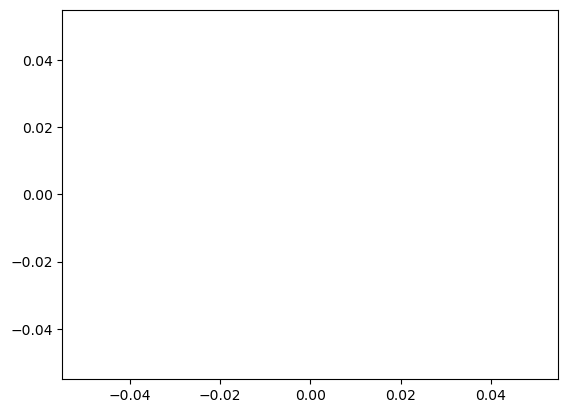

nan


In [96]:
plt.plot(T, Error, '-r')
plt.show()
Min_E = min(Error)
print(Min_E)

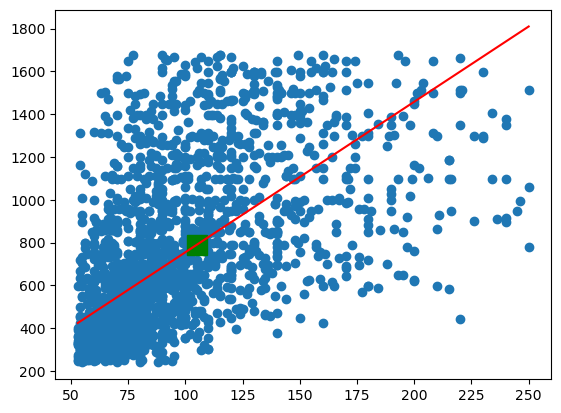

789.7927579957172


In [79]:
X_point = 105
Y_point = w0 + w1*X_point

plt.scatter(X, Y)
plt.plot(X_point, Y_point, 'gs',markersize = 15)
plt.plot([min(X), max(X)],[min(Y_pred),max(Y_pred)],color='red')
plt.show()

print(Y_point)

In [84]:
res=Y_point*1000
print(res)

789792.7579957172


# Respuesta: 789792.7579957172

In [27]:
matriz = np.array(data)
columna_deseada = matriz[:, 1]
valores_unicos = np.unique(columna_deseada)
print("Valores únicos en la primera columna:", valores_unicos)

Valores únicos en la primera columna: ['apartment' 'house']
